# 4 Mel Frequency Cepstrum Coefficients step-by-step

All tests OK
All tests OK


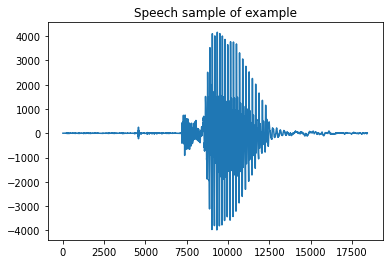

In [1]:
#Koray Amico Kulbay, DT2119, Lab1
import lab1_proto as proto
import numpy as np
import matplotlib.pyplot as plt
from test import tests

tests()
example = np.load('lab1_example.npz', allow_pickle=True)['example'].item()
data = np.load('lab1_data.npz', allow_pickle=True)['data']

#Getting familiar with the set up
plt.plot(range(1,len(example["samples"])+1),example["samples"])
plt.title("Speech sample of example")
plt.show()



## 4.1 Enframe

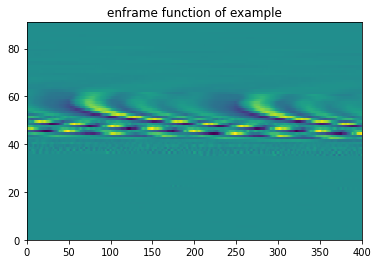

In [2]:
fsampling = 20E3 #Hz
winlen = int(20E-3*fsampling)
winshift = int(10E-3*fsampling)
examplesignal = example["samples"]
examplesignal = proto.enframe(examplesignal,winlen,winshift)
plt.pcolormesh(examplesignal)
plt.title("enframe function of example")
plt.show()

## 4.2 Pre-emphasis
Linear filter in general: $y[n] = \frac{1}{a_0}(\sum_{i=0}^Pb_ix[n-i] - \sum_{j=1}^Q a_jy[n-j])$

We want $y[n] = x[n] - \alpha x[n] $. 

Choose: P=1, Q=NaN, $b_0$=1, $b_1$=$- \alpha$ = -0.97, $a_0$=1

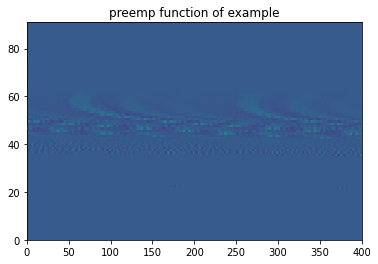

In [3]:
examplesignal = proto.preemp(examplesignal)
plt.pcolormesh(examplesignal)
plt.title("preemp function of example")
plt.show()

## 4.3 Hamming Window

This is needed to avoid sidelobes in fourier transform. Lose a bir of resolution, but better to lose that than having interference. 

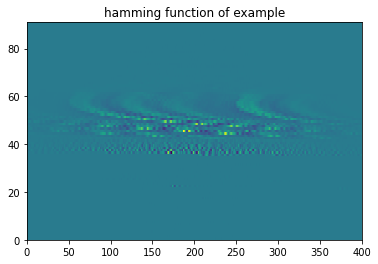

In [4]:
examplesignal = proto.windowing(examplesignal)
plt.pcolormesh(examplesignal)
plt.title("hamming function of example")
plt.show()

## 4.4 Fast Fourier Transform 

!! TODO: $f_{max} = ??$. Know that it's in the middle, ie at sample 512/2, but which frequency is that?

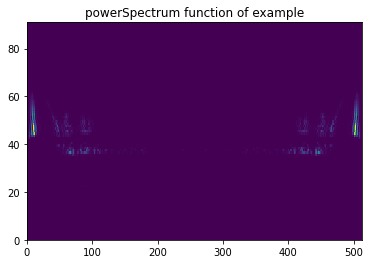

In [5]:
examplesignal = proto.powerSpectrum(examplesignal,512)
plt.pcolormesh(examplesignal)
plt.title("powerSpectrum function of example")
plt.show()

## 4.5 Mel filterbank log spectrum

The filter for the higher frequencies consists of "wider" triangles with larger relative spacing. This results in a lower resolution for high frequencies. This translated well into natural hearing of humans. 

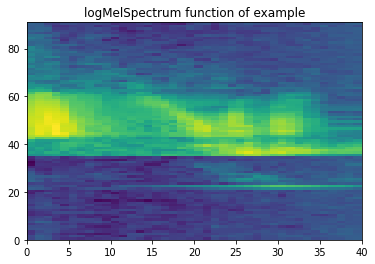

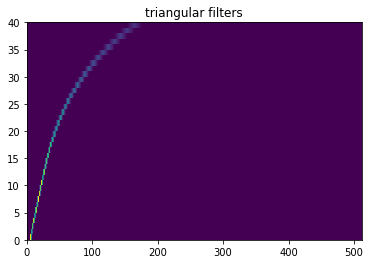

In [6]:
examplesignal,trfil = proto.logMelSpectrum(examplesignal,fsampling)
plt.pcolormesh(examplesignal)
plt.title("logMelSpectrum function of example")
plt.show()

plt.pcolormesh(trfil)
plt.title("triangular filters")
plt.show()

## 4.6 Cosine transform and Liftering

The expression for the coefficients is: 
$C_j = \sqrt{\frac{2}{N}} \sum_{i=1}^N A_i \cos(\frac{j \pi (i-0.5)}{N})$

We can see that each coefficient is affected by the size of N. This means that choosing a specific value for $N_p$ rather than truncating the desired coefficients from after using $N_q$, where $q>p$ $\Rightarrow \bar{C}_p \neq \bar{C}_q$. This can also be explained that when using different total number of coefficients a coeffiecent $C_i$ covers the amplitude of different "frequency spans".



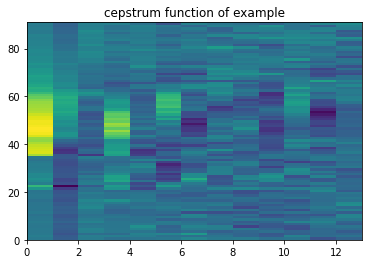

In [7]:
examplesignal = proto.cepstrum(examplesignal,13)
plt.pcolormesh(examplesignal)
plt.title("cepstrum function of example")
plt.show()